# Graveyard

### Resting place for all ideas that didn't work out but I'm too attached to delete.

# Dimensionality Reduction

Reduce the number of dimensions. There are two independent quantities you want to remove from your analysis:

1. The dengerate space: Take an SVD and retain only the first K eigen vectors and eigen values.
2. The visibility space: Construct a projection matrix using the following theorem: 

## Theorem on Projection Matrices:

The necessary and sufficient condition for a square matrix P of order $n$ to be a projector onto subspace V of dimensionality $r$ (dim(V) = r) is given by: 

$$ P = T \Delta_r T^{-1}$$

where T is any arbitrary non-singular square matrix of order $n$ and 

$$\Delta_r = 
\begin{bmatrix}
    1 & 0 & \dots & 0 & 0 & \dots  & 0 \\
    0 & 1 & \dots & 0 & 0 & \dots  & 0 \\
    \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & 1 & 0 & \dots  & 0 \\
    0 & 0 & \dots & 0 & 0 & \dots  & 0 \\
    \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & 0 & 0 & \dots  & 0 
\end{bmatrix} $$

There are $r$ unities on the leading diagonals, $1 \leq r \leq n$.

In [ ]:
# Original parameter space with 7 ants and 9 visibilities.
del_d = np.identity(N)

# Remove all visibilities except the shortest three baselines.
del_d[Nants:,Nants:] = 0

# Projection matrix in visibility subspace:
Pv = np.einsum('nm,m,pm->np',Ur,np.diag(del_d),Vr.T)

#Pv = del_d

plt.matshow(np.log10(np.abs(Pv)))
plt.colorbar()

## Condition to verify projection matrix:

The necessary and sufficient condition for a square matrix P of order n to be the projection matrix onto V (dim(V) = $r$) is given by:

$$P^2 = P$$

In [ ]:
# Check if you have constructed a genuine projection matrix

np.all(np.isclose(np.dot(Pv,Pv),Pv))

## Remove degenerate space

Use the same theorem as before, set all zero eigen values to zero.

In [ ]:
pi_s_real = np.asarray([1 if s>10**-11 else 0 for s in Sr])
pi_s_imag = np.asarray([1 if s>10**-11 else 0 for s in Si])

Pr = np.einsum('nm,m,mp->np',Ur,pi_s_real,Vr)
Pi = np.einsum('nm,m,mp->np',Ui,pi_s_imag,Vi)

#Check that your projection matrix satisfies the necessary and sufficient conditions.
print np.all(np.isclose(np.dot(Pr,Pr), Pr))
print np.all(np.isclose(np.dot(Pi,Pi), Pi))

warnings.filterwarnings('ignore')

fig,ax = plt.subplots(1,2)

im = ax[0].matshow(np.log10(np.abs(Pr)),vmax=0,vmin=-3,cmap='viridis')
ax[0].set_title('Real')

im = ax[1].matshow(np.log10(np.abs(Pi)),vmax=0,vmin=-3,cmap='viridis')
ax[1].set_title('Imaginary')

In [ ]:
Upr, Spr, Vpr = np.linalg.svd(Pr)

plt.plot(Spr,'o-')

# Combining Projection Matrices

Say a field $F$ is a direct sum of two different subspaces:

$$F = M_1 \oplus N_1 = M_2 \oplus N_2$$

If $P_1$ is a projection onto $M_1$ along $N_1$ and $P_2$ is a projection onto $M_2$ along $N_2$, 

$P = P_1 - P_2$ is a projection if and only if $P_1 P_2 = P_2 P_1 = P_2$.

$P= P_1 - P_2$ is the projection onto $M = M_1 \cap N_2$ along $N = N_1 \oplus M_2$


In our case, $M_1 \equiv g$, $N_2 \equiv N$ (null space), $N_1 \equiv V$ and $M_2 \equiv R$ (row space)

### Understanding the projection matrix built

In our case 

$$P_1 P_2 = P_2 P_1 = P_2$$ 

This makes sense because removing the degenerate space should not cause any changes (our vectors did not lie in that space in the first place). 

That said, I do not understand why $Pv$ and $Pr$ can be constructed the same way, using the same vectors but result in two different subspaces.

In [ ]:
print np.all(np.isclose(np.dot(Pv,Pr),Pv))
print np.all(np.isclose(np.dot(Pr,Pv),Pv))

In [ ]:
P = Pr - pi_d
np.all(np.isclose(np.dot(P,P),P))

In [ ]:
warnings.filterwarnings('ignore')
plt.matshow(np.log10(np.abs(np.dot(Pv,Pr))),vmax=0,vmin=-3,cmap='viridis')
plt.colorbar()

In [ ]:
P = np.dot(Pv,Pr)

Up,Sp,Vp = np.linalg.svd(P)

plt.plot(Sp,'o-')

In [ ]:
P = np.dot(Pr,Pv)

Up,Sp,Vp = np.linalg.svd(P)

plt.plot(Sp,'o-')

In [ ]:
P = np.dot(np.dot(Pr,Pv),Pr)

Up,Sp,Vp = np.linalg.svd(P)

plt.plot(Sp,'o-')

In [ ]:
warnings.filterwarnings('ignore')
plt.matshow(np.log10(np.abs(np.dot(np.dot(Pr,Pv),Pr))),vmax=0,vmin=-3,cmap='viridis')
plt.colorbar()

In [ ]:
# Final projection matrix
P = np.dot(Pr,Pv)

In [ ]:
#Original basis vectors are the row vectors of an identity matrix of order N
B = np.identity(np.shape(Mr)[0])

#For every row vector b of B, project b into new subspace
Bp = np.dot(P,B)

plt.matshow(np.dot(Bp.T,Bp))
plt.colorbar()

In [ ]:
#Reconstruct A with the new basis
Ap = genA(redbls,np.dot(Bp.T,Bp))

In [ ]:
#New covariance matrix is Mp = A.T * A

Mp = np.dot(np.real(Ap.T),np.real(Ap))
Up,Sp,Vp = np.linalg.svd(Mp)

plt.semilogy(Sr,'o-',label='Original Basis')
plt.semilogy(Sp,'o-',label='Reduced dimensions')
plt.legend(loc=3)
plt.show()

# Log normal distribution of gains

The above plot shows the covariance of the linear additive gains (assuming they form a multivariate normal distribution). The result of log-cal that you want to compare this with, is in multiplicative gains. The multiplicative gains will form a log-normal distribution if your first assumption holds.

In [ ]:
# Generate random gains for a start

gains = np.random.normal(loc=0,scale=.01,size=Nants) + 1j*np.random.normal(loc=0,scale=np.pi,size=Nants)

plt.figure()
plt.plot(np.abs(np.exp(gains)))

In [ ]:
# Covariance of multivariate lognormal distribution
var_G = np.array(cond_covr_t+ 1j*cond_covi_t)
var_g = np.zeros((Nants,Nants),dtype=np.complex)

for i in range(Nants):
    for j in range(Nants):
        var_g[i][j] = np.exp(0.5*(var_G[i][i]+var_G[j][j]))*(np.exp(var_G[i][j])-1) 
        #gains[i]+gains[j]+

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(np.abs(np.real(var_g)))
plt.colorbar(shrink=0.75)
plt.subplot(122)
plt.imshow(np.abs(np.imag(var_g)))
plt.colorbar(shrink=0.75)

In [ ]:
with open('sim_gain_sols.cp','r') as fp:
    input_gains, subbl_gains, allbl_gains = cp.load(fp)

In [ ]:
for a in range(37):
    input_gains[(a,'x')] = np.asarray(input_gains[(a,'x')])
    subbl_gains[(a,'x')] = np.asarray(subbl_gains[(a,'x')])
    allbl_gains[(a,'x')] = np.asarray(allbl_gains[(a,'x')])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for ant in range(1):
    fig.suptitle('Ant %d'%ant)
    ax.clear()
    ax.semilogy(np.abs(input_gains[(ant,'x')]),'c',label='All baselines',alpha=0.3)
    ax.semilogy(np.abs(subbl_gains[(ant,'x')]-input_gains[(ant,'x')]),'b',label='Subset baselines',alpha=0.7)
    ax.semilogy(np.abs(allbl_gains[(ant,'x')]-input_gains[(ant,'x')]),'m',label='All baselines',alpha=0.3)
    time.sleep(1)
    fig.canvas.draw()

In [ ]:
all_gainres = []
sub_gainres = []

N = 2**16

for ant in input_gains.keys():
    all_gainres.append(allbl_gains[ant][:N])#-np.mean(allbl_gains[ant][:N]))
    sub_gainres.append(subbl_gains[ant][:N])#-np.mean(subbl_gains[ant][:N]))
    #all_gainres.append(allbl_gains[ant][:N]-input_gains[ant][:N])
    #sub_gainres.append(subbl_gains[ant][:N]-input_gains[ant][:N])

subcov = np.cov(sub_gainres)
allcov = np.cov(all_gainres)

#subcov = np.dot(sub_gainres, np.conjugate(sub_gainres).T)/(np.shape(sub_gainres)[1]-1)
#allcov = np.dot(all_gainres, np.conjugate(all_gainres).T)/(np.shape(all_gainres)[1]-1)

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.title('Sub Real')
plt.imshow(np.log10(np.real(subcov)),vmin=-3)
plt.colorbar(shrink=0.7)

plt.subplot(222)
plt.title('All real')
plt.imshow(np.log10(np.real(allcov)),vmin=-3)
plt.colorbar(shrink=0.7)

plt.subplot(223)
plt.title('Sub Imag')
plt.imshow(np.imag(subcov))
plt.colorbar(shrink=0.7)

plt.subplot(224)
plt.title('All Imag')
plt.imshow(np.imag(allcov))
plt.colorbar(shrink=0.7)

# Complex number multiplication

Back from when I took $A^{\dagger}A$ literally and didn't quite understand that logcal separates the real and imaginary parts into something meaningful

In [ ]:
plt.figure()
plt.imshow(np.dot(np.real(A.T),np.imag(A)) - np.dot(np.imag(A.T),np.real(A)),cmap='PiYG')
plt.colorbar()

In [ ]:
Acov = np.cov(A,rowvar=False)

In [ ]:
plt.figure(figsize=(9,5))
plt.subplot(121)
plt.title('Real A_T*A')
plt.imshow(Mr)
plt.colorbar(shrink=0.5)
plt.subplot(122)
plt.title('Covariance matrix')
plt.imshow(np.real(np.linalg.pinv(Acov))[:Nants,:Nants])#,vmin=0.1)
plt.colorbar(shrink=0.5)

# Noob days

Of trying to understand wtf SVD analysis is doing

In [ ]:
# Compare U and V for the real and imaginary parts.
# Since A.T * A is symmetric, U and V should be equal.

print np.all(np.isclose(Ucr,Vcr.T))
print np.all(np.isclose(Uci,(-1*Vci.T)))

# Conditional Covariance

The question to ask is: What is the covariance matrix of the gain solutions after you have solved the entire system of equations? How does this covariance change if you solve only a subsystem of the equations?

The answer to the first question is given by the conditional covariance matrix. If you assume gaussian statistics for all the variables (gains and visibilities), this conditional covariance matrix is given by the following process:

1. Invert the full covariance matrix
2. Drop the rows and columns for the variables to condition on
3. Invert back to get the conditional covariance matrix

## Is conditional covariance the right parameter?

Last discussion with Josh was that, conditional covariance is not very meaningful because we are not fixing the visibilities through some sky model or another parameter like that. Maybe the right matrix to consider for covariance is the marginalized gains.

<IPython.core.display.Javascript object>


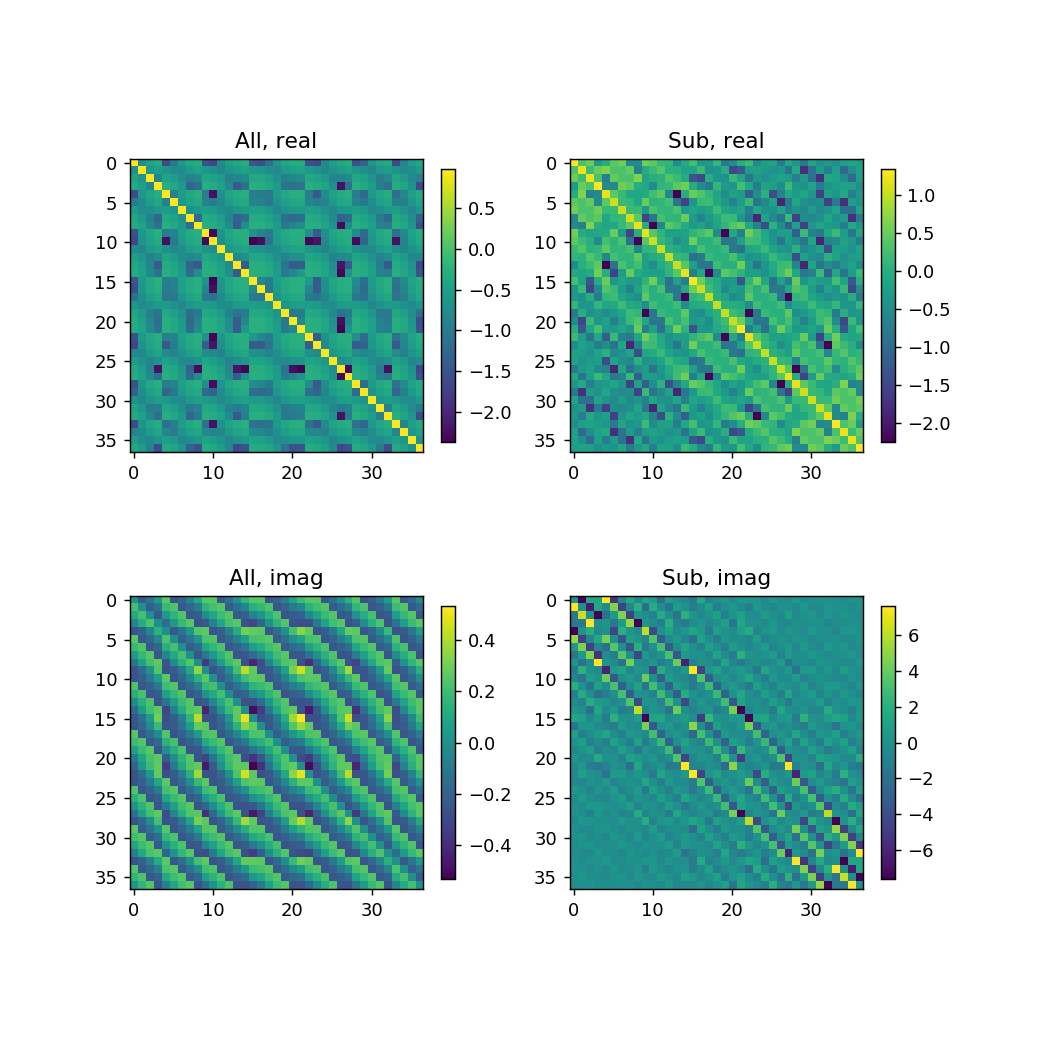

In [11]:
Acov_cond = np.linalg.pinv(np.cov(A,rowvar=False)[:Nants,:Nants])
Atcov_cond = np.linalg.pinv(np.cov(At,rowvar=False)[:Nants,:Nants])

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.title('All, real')
plt.imshow(np.log10(np.abs(np.real(Acov_cond))))#,vmin=-4)
plt.colorbar(shrink=0.75)

plt.subplot(222)
plt.title('Sub, real')
plt.imshow(np.log10(np.abs(np.real(Atcov_cond))))#,vmin=-3)
plt.colorbar(shrink=0.75)

plt.subplot(223)
plt.title('All, imag')
plt.imshow((np.imag(Acov_cond)))#,vmin=-4)
plt.colorbar(shrink=0.75)

plt.subplot(224)
plt.title('Sub, imag')
plt.imshow((np.imag(Atcov_cond)))#,vmin=-3)
plt.colorbar(shrink=0.75)

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.scatter(x,y,c=np.log(neqs))
#plt.imshow(np.log(neqs),vmin=6)
plt.colorbar()
plt.subplot(222)
plt.scatter(x,y,c=np.log(neqs_sub))
#plt.imshow(np.log(neqs_sub),vmin=4)
plt.colorbar()
plt.subplot(223)
plt.scatter(x,y,c=np.abs(np.diag(Acov_cond)),cmap='viridis_r')
plt.colorbar()
plt.subplot(224)
plt.scatter(x,y,c=np.abs(np.diag(Atcov_cond)),cmap='viridis_r')
plt.colorbar()
plt.show()

In [ ]:
Ur,Scr,Vr = np.linalg.svd(cond_covr)
Ui,Sctr,Vi = np.linalg.svd(cond_covr_t)

plt.figure()
plt.semilogy(Scr,'o-',label='All baselines')
plt.semilogy(Sctr,'o-',label='Truncated')
plt.legend()
plt.show()

In [ ]:
import matplotlib
plt.figure(figsize=(10,16))
cmap = matplotlib.cm.get_cmap('Spectral')

x = [v[0] for v in antpos.values()]
y = [v[1] for v in antpos.values()]

for i in range(37):
    plt.subplot(8,5,i+1)
    plt.title('Ant %d'%i)
    plt.scatter(x,y,c=np.abs(np.real(cond_covr_t[i])))
    plt.axis('off')

Extrapolating the above argument, it will be interesting to see how the covariance matrix will change when you consider incrementally more baselines. 

# Real time gain solutions from IDR 2.0

# Add lognormal noise to data

In [ ]:
Nsim = 2**10
gains = {}
gain_subsols_log = {}
gain_allsols_log = {}
noise = {}

for a in range(37):
    gains[(a,'x')] = []
    gain_subsols_log[(a,'x')] = []
    gain_allsols_log[(a,'x')] = []
    
gains_input, vis, data = redcal.sim_red_data(reds,shape=(1,1))
for bl in data.keys():
    noise[bl] = []
    
for i in range(Nsim):
    print i
    gains_input, vis, data = redcal.sim_red_data(reds,shape=(1,1))
    for k,v in data.items():
        n = redcal.noise((1,1))
        data[k] = np.exp(np.log(v) + n)
        noise[k].append(data[k]-v)
    
    redcalibrator = redcal.RedundantCalibrator(reds)
    sol_degen = redcalibrator.logcal(data)
    sol = redcalibrator.remove_degen(antpos, sol_degen, degen_sol=gains_input)
    
    redcalibrator_sub = redcal.RedundantCalibrator([reds[0],reds[1],reds[2]])
    subsol_degen = redcalibrator_sub.logcal(data)
    subsol = redcalibrator_sub.remove_degen(antpos, subsol_degen, degen_sol=gains_input)
    
    for a in range(37):
        gains[(a,'x')].append(gains_input[(a,'x')][0][0])
        gain_subsols[(a,'x')].append(subsol[(a,'x')][0][0])
        gain_allsols[(a,'x')].append(sol[(a,'x')][0][0])
        
# Convert to numpy array from list for easy indexing
for a in range(37):
    gains[(a,'x')] = np.asarray(gains[(a,'x')])
    gain_subsols[(a,'x')] = np.asarray(gain_subsols[(a,'x')])
    gain_allsols[(a,'x')] = np.asarray(gain_allsols[(a,'x')])

In [ ]:
noise_allbls = []
for bl in noise.keys():
    noise_allbls.append(np.array(noise[bl])[:,0,0])
    
ncov = np.cov(noise_allbls)

plt.figure()
plt.imshow(np.real(ncov), interpolation='nearest')
plt.colorbar(shrink=0.75)

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
hist, bins, misc = plt.hist(np.diag(np.real(noise_allbls)),bins=100)
plt.subplot(122)
hist, bins, misc = plt.hist(np.diag(np.imag(noise_allbls)),bins=100)

In [ ]:
Nsim = 2**10
gains = {}
gain_subsols = {}
gain_allsols = {}

for a in range(37):
    gains[(a,'x')] = []
    gain_subsols[(a,'x')] = []
    gain_allsols[(a,'x')] = []
    
for i in range(Nsim):
    print i
    gains_input, vis, data = redcal.sim_red_data(reds,shape=(1,1))
    for k,v in data.items():
        n = redcal.noise((1,1))
        data[k] = v+ 2*n
    
    redcalibrator = redcal.RedundantCalibrator(reds)
    sol_degen = redcalibrator.logcal(data)
    sol = redcalibrator.remove_degen(antpos, sol_degen, degen_sol=gains_input)
    
    redcalibrator_sub = redcal.RedundantCalibrator([reds[0],reds[1],reds[2]])
    subsol_degen = redcalibrator_sub.logcal(data)
    subsol = redcalibrator_sub.remove_degen(antpos, subsol_degen, degen_sol=gains_input)
    
    for a in range(37):
        gains[(a,'x')].append(gains_input[(a,'x')][0][0])
        gain_subsols[(a,'x')].append(subsol[(a,'x')][0][0])
        gain_allsols[(a,'x')].append(sol[(a,'x')][0][0])

# Convert to numpy array from list for easy indexing
for a in range(37):
    gains[(a,'x')] = np.asarray(gains[(a,'x')])
    gain_subsols[(a,'x')] = np.asarray(gain_subsols[(a,'x')])
    gain_allsols[(a,'x')] = np.asarray(gain_allsols[(a,'x')])

In [ ]:
noise_allbls = []
for bl in noise.keys():
    noise_allbls.append(np.array(noise[bl])[:,0,0])
    
ncov = np.cov(noise_allbls)

plt.figure()
plt.imshow(np.real(ncov), interpolation='nearest')
plt.colorbar(shrink=0.75)

In [ ]:
ant_gainres = []
ant_gainres_all = []
N = 1024

for ant in gains.keys():
    ant_gainres_all.append(gain_allsols[ant][:N]-np.mean(gain_allsols[ant][:N]))
    ant_gainres.append(gain_subsols[ant][:N]-np.mean(gain_subsols[ant][:N]))
    #ant_gainres_all.append(gain_allsols[ant][:N]-gains[ant][:N])
    #ant_gainres.append(gain_subsols[ant][:N]-gains[ant][:N])

# np.shape(ant_gainres)
cov = np.cov(ant_gainres)
cov_all = np.cov(ant_gainres_all)

#cov = np.dot(ant_gainres, np.conjugate(ant_gainres).T)/(np.shape(ant_gainres)[1]-1)
#cov_all = np.dot(ant_gainres_all,np.conjugate(ant_gainres_all).T)/(np.shape(ant_gainres_all)[1]-1)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(np.real(cov))
plt.colorbar(shrink=0.7)

plt.subplot(222)
plt.imshow(np.real(cov_all))
plt.colorbar(shrink=0.7)

plt.subplot(223)
plt.imshow(np.imag(cov))
plt.colorbar(shrink=0.7)

plt.subplot(224)
plt.imshow(np.imag(cov_all))
plt.colorbar(shrink=0.7)

# plt.matshow(np.log10(np.abs(cov)))
# plt.colorbar(shrink=0.7)

# plt.matshow(np.log10(np.abs(cov_all)))
# plt.colorbar(shrink=0.7)

In [ ]:
for a in range(37):
    gains[(a,'x')] = np.asarray(gains[(a,'x')])
    gain_subsols[(a,'x')] = np.asarray(gain_subsols[(a,'x')])
    gain_allsols[(a,'x')] = np.asarray(gain_allsols[(a,'x')])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for ant in range(0,37):
    fig.suptitle('Ant %d'%ant)
    ax.clear()
    ax.semilogy(np.abs(gains[(ant,'x')]),'c',label='All baselines',alpha=0.3)
    ax.semilogy(np.abs(gain_allsols[(ant,'x')]-gains[(ant,'x')]),'b',label='All baselines',alpha=0.7)
    ax.semilogy(np.abs(gain_subsols[(ant,'x')]-gains[(ant,'x')]),'m',label='Only shortest baselines',alpha=0.3)
    #ax.semilogy(np.abs(gains[(ant,'x')][0]),'g',label='Input gains',alpha=0.7)
#     ax.plot(np.angle(subsol[(ant,'x')][0])-np.angle(gains[(ant,'x')][0]),'m',label='Only shortest baselines',alpha=0.5)
#     ax.plot(np.angle(sol[(ant,'x')][0])-np.angle(gains[(ant,'x')][0]),'b',label='All baselines',alpha=0.7)
#     #ax.plot(np.angle(gains[(ant,'x')][0]),'g',label='Input gains',alpha=0.7)
    time.sleep(1)
    fig.canvas.draw()

## Single simulation

In [ ]:
gains_input, vis, data = redcal.sim_red_data(reds,shape=(1,1))
data = {k:v+0*redcal.noise((1,1)) for k,v in data.items()}

redcalibrator = redcal.RedundantCalibrator(reds)
sol_degen = redcalibrator.logcal(data)
sol = redcalibrator.remove_degen(antpos, sol_degen, degen_sol=gains_input)
    
redcalibrator_sub = redcal.RedundantCalibrator([reds[0],reds[1],reds[2]])
subsol_degen = redcalibrator_sub.logcal(data)
subsol = redcalibrator_sub.remove_degen(antpos, subsol_degen, degen_sol=gains_input)

In [ ]:
ant_gainres = []
ant_gainres_all = []

for ant in range(37):
    ant_gainres_all.append((sol[(ant,'x')][0]))
    ant_gainres.append((subsol[(ant,'x')][0]))

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(np.dot(np.abs(ant_gainres),np.transpose(np.abs(ant_gainres))))
plt.subplot(122)
plt.imshow(np.dot(np.abs(ant_gainres_all),np.transpose(np.abs(ant_gainres_all))))

In [ ]:
plt.figure(figsize=(8,50))

sub_bls = [redbls[0],redbls[1],redbls[2]]

for n,reds in enumerate(redbls):
    sub_bls = redbls[:n+1]
    Att = genA(sub_bls)
    Mrtt = np.dot(np.real(Att.T), np.real(Att))
    Mrtt_p = Mrtt[:Nants,:Nants]
    cond_cov_tt = np.linalg.pinv(Mrtt_p)
    plt.subplot(21,3,n+1)
    plt.title(n+1)
    plt.imshow(cond_cov_tt,interpolation='nearest',cmap='viridis')
    plt.axis('off')